In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../SatLib')

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import islTradestudyFunc
%matplotlib inline

In [4]:
islTradestudyFunc.calcMinMaxParams(alt=600, dist_thres=1000)

'Minimum number of satellites required: 44'

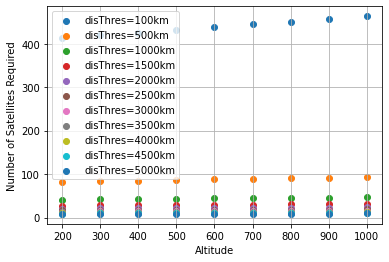

In [5]:
alt = np.linspace(200, 1000, 9)
disThres = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
for i in disThres:
    numSats = (12742*math.pi+2*math.pi*alt)/i
    plt.scatter(alt, numSats, label='disThres={}km'.format(i))
plt.xlabel('Altitude')
plt.ylabel('Number of Satellites Required')
plt.grid()
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


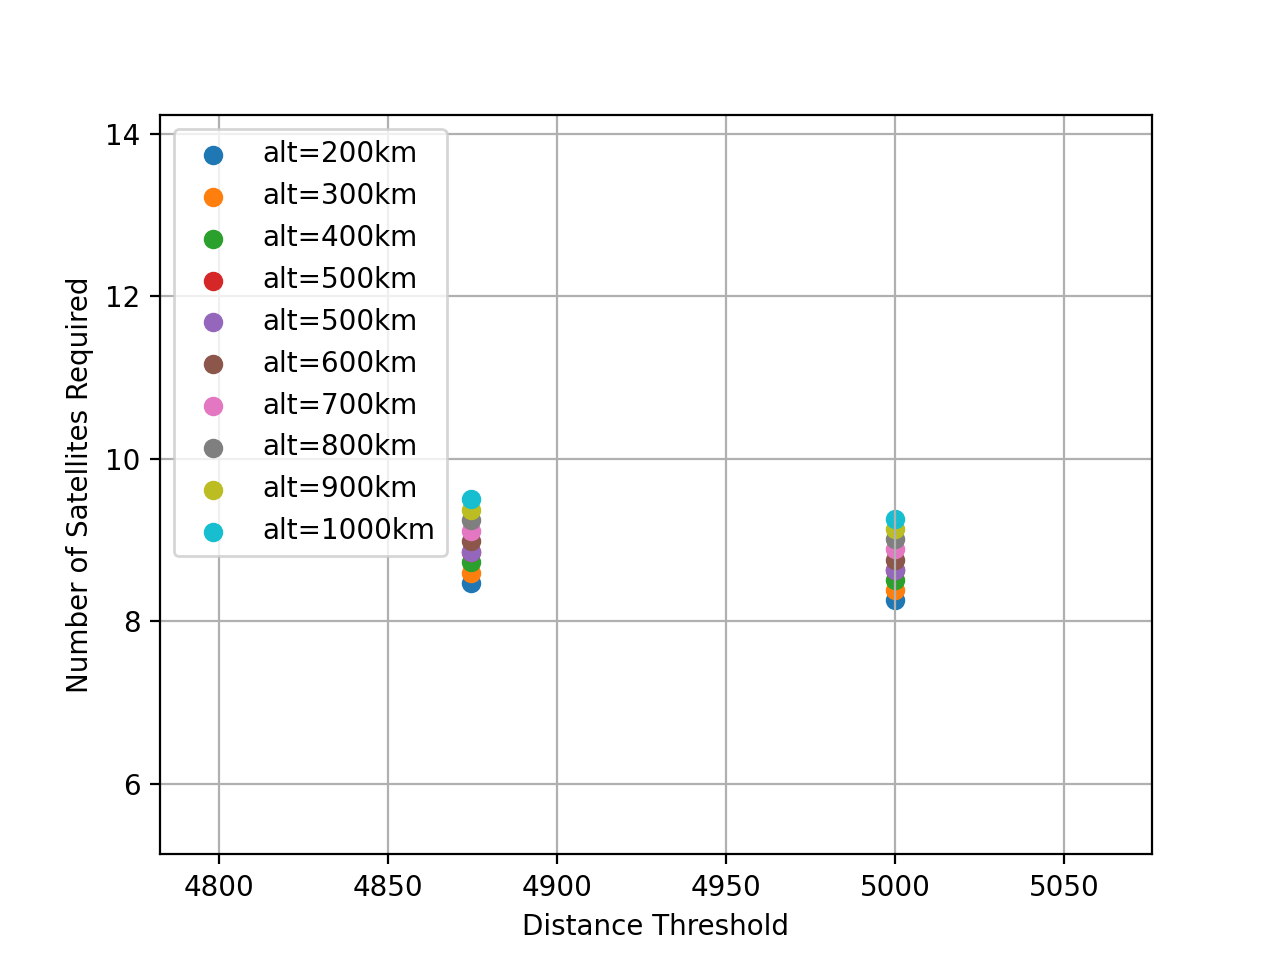

In [6]:
%matplotlib notebook
disThres = np.linspace(100, 5000, 40)
alt = [200, 300, 400, 500, 500, 600, 700, 800, 900, 1000]
for i in alt:
    numSats = (12742*math.pi+2*math.pi*i)/disThres
    plt.scatter(disThres, numSats, label='alt={}km'.format(i))
plt.xlabel('Distance Threshold')
plt.ylabel('Number of Satellites Required')
plt.grid()
plt.legend()
plt.show()

In [6]:
import satbox as sb
import astropy.units as u
from astropy.time import Time
import Interval_Finder as IF

In [7]:
input_dict = {'i': 60, 't': 56, 'p': 1, 'f': 0, 'alt': 505, 'dist_threshold': 1000, 'time': '2022-06-08T00:00:00', 'prop_dur': 1}
i = input_dict['i'] *u.deg
t = input_dict['t']
p = input_dict['p']
f = input_dict['f']
alt = input_dict['alt'] *u.km
dist_threshold = input_dict['dist_threshold']
time = input_dict['time']
prop_dur = input_dict['prop_dur']

In [8]:
epoch = Time(time, format='isot', scale='utc')
walker = sb.Constellation.from_walker(i, t, p, f, alt)
t2propagate = prop_dur*u.day
tStep = 60 * u.s
walkerSim = sb.SimConstellation(walker, t2propagate, tStep, verbose = True)
walkerSim.propagate()

/Users/jacelu/opt/anaconda3/envs/SatelliteExample/lib/python3.9/site-packages/astropy/units/decorators.py:253: UserWarning: Wrapping true anomaly to -π <= nu < π
  return_ = wrapped_function(*func_args, **func_kwargs)


In [9]:
relative_position_data_ISL = IF.get_relative_position_data_ISL(walkerSim,dist_threshold)
satellites = IF.find_feasible_links_ISL(t, relative_position_data_ISL)
L_avail_ISL = IF.get_availability_ISL(satellites, relative_position_data_ISL)
L_poly_ISL = IF.get_polyline_ISL(satellites, relative_position_data_ISL)

/Users/jacelu/opt/anaconda3/envs/SatelliteExample/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in arccos
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found
No False Intervals Found


In [10]:
walker.generate_czml_file(prop_duration=prop_dur, sample_points=prop_dur*144, fname='islTradestudy', satellites=satellites, L_avail_ISL=L_avail_ISL, L_poly_ISL=L_poly_ISL, show_polyline_ISL=True, create_file=True)